In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import matplotlib as mpl

In [2]:
import piplite
await piplite.install(['pandas', 'numpy', 'seaborn', 'matplotlib', 'scikit-learn', 'scipy'])
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [82]:
data= pd.read_csv('DataFrame.csv',delimiter=';')
print("The first 5 rows of the data") 
data.head()## original data set

The first 5 rows of the data


,geo,1week,1month,3month,6month,12month,Period,CV_PLI,CV_VI_HAB,INX_A_AVG,RCH_A_AVG,DW_XST,DW_NW,DW_EXST_ind,DW_NEW_ind,TOTAL_ind,DW_EXST,DW_NEW,TOTAL
0,EU27_2020,"0,34","0,397","0,634","0,944","1,212",2010.Q1,"28,3","44,5","93,03","1,8","734,01","266,01","98,98","100,62","99,36",0.0,0.0,0.0
1,EU27_2020,"0,42","0,485","0,767","1,041","1,306",2010.Q2,"28,3","44,5","93,03","1,8","734,01","266,01","100,25","101,12","100,41",0.0,0.0,0.0
2,EU27_2020,"0,52","0,625","0,892","1,146","1,433",2010.Q3,"28,3","44,5","93,03","1,8","734,01","266,01","100,68","101,37","100,8",0.0,0.0,0.0
3,EU27_2020,"0,612","0,782","1,006","1,227","1,507",2010.Q4,"28,3","44,5","93,03","1,8","734,01","266,01","100,35","101,81","100,68",0.0,0.0,0.0
4,EU27_2020,"0,792","0,968","1,239","1,546","1,996",2011.Q1,"28,1","44,3","95,69","2,9","757,38","242,62","100,59","102,04","100,9",0.0,0.0,0.0


Measures we have:
EURIBOR: 1week,1month,3month,6month,12month
Convergence indicators: CV_PLI, CV_VI_HAB 
The Harmonised Index of Consumer Prices (HICP) gives comparable measures of inflation: INX_A_AVG,RCH_A_AVG
The House Price Index (HPI) measures inflation in the residential property market:DW_XST,DW_NW,DW_EXST_ind ,DW_NEW_ind ,TOTAL_ind
House sales: DW_EXST,DW_NEW, TOTAL


In [86]:
df = data
print(df.dtypes)

geo             object
1week           object
1month          object
3month          object
6month          object
12month         object
Period          object
CV_PLI          object
CV_VI_HAB       object
INX_A_AVG       object
RCH_A_AVG       object
DW_XST          object
DW_NW           object
DW_EXST_ind     object
DW_NEW_ind      object
TOTAL_ind       object
DW_EXST        float64
DW_NEW         float64
TOTAL          float64
dtype: object


In [84]:


# Function to convert 'YYYY.QX' to 'YYYYMM'
def convert_period_to_date(period_str):
    # Split the string into year and quarter
    year, quarter = period_str.split('.')
   
    # Map quarters to corresponding month
    quarter_to_month = {
        'Q1': '03',
        'Q2': '06',
        'Q3': '09',
        'Q4': '12'
    }
   
    # Get the corresponding month
    month = quarter_to_month[quarter]
  
    # Combine year and month
    return f'{year}{month}'



In [88]:
df['Formatted_Period'] = df['Period'].apply(convert_period_to_date)
df.head()

,geo,1week,1month,3month,6month,12month,Period,CV_PLI,CV_VI_HAB,INX_A_AVG,RCH_A_AVG,DW_XST,DW_NW,DW_EXST_ind,DW_NEW_ind,TOTAL_ind,DW_EXST,DW_NEW,TOTAL,Formatted_Period
0,EU27_2020,"0,34","0,397","0,634","0,944","1,212",2010.Q1,"28,3","44,5","93,03","1,8","734,01","266,01","98,98","100,62","99,36",0.0,0.0,0.0,201003
1,EU27_2020,"0,42","0,485","0,767","1,041","1,306",2010.Q2,"28,3","44,5","93,03","1,8","734,01","266,01","100,25","101,12","100,41",0.0,0.0,0.0,201006
2,EU27_2020,"0,52","0,625","0,892","1,146","1,433",2010.Q3,"28,3","44,5","93,03","1,8","734,01","266,01","100,68","101,37","100,8",0.0,0.0,0.0,201009
3,EU27_2020,"0,612","0,782","1,006","1,227","1,507",2010.Q4,"28,3","44,5","93,03","1,8","734,01","266,01","100,35","101,81","100,68",0.0,0.0,0.0,201012
4,EU27_2020,"0,792","0,968","1,239","1,546","1,996",2011.Q1,"28,1","44,3","95,69","2,9","757,38","242,62","100,59","102,04","100,9",0.0,0.0,0.0,201103


Change data types to float

In [91]:
df['1week'] = df['1week'].str.replace(',', '.').astype(float)
df['1month'] = df['1month'].str.replace(',', '.').astype(float)
df['3month'] = df['3month'].str.replace(',', '.').astype(float)
df['6month'] = df['6month'].str.replace(',', '.').astype(float)
df['12month'] = df['12month'].str.replace(',', '.').astype(float)
df['CV_PLI'] = df['CV_PLI'].str.replace(',', '.').astype(float)
df['CV_VI_HAB'] = df['CV_VI_HAB'].str.replace(',', '.').astype(float)
df['INX_A_AVG'] = df['INX_A_AVG'].str.replace(',', '.').astype(float)
df['RCH_A_AVG'] = df['RCH_A_AVG'].str.replace(',', '.').astype(float)
df['DW_XST'] = df['DW_XST'].str.replace(',', '.').astype(float)
df['DW_NW'] = df['DW_NW'].str.replace(',', '.').astype(float)
df['DW_EXST_ind'] = df['DW_EXST_ind'].str.replace(',', '.').astype(float)
df['DW_NEW_ind'] = df['DW_NEW_ind'].str.replace(',', '.').astype(float)
df['TOTAL_ind'] = df['TOTAL_ind'].str.replace(',', '.').astype(float)
df['DW_EXST'] = df['DW_EXST'].str.replace(',', '.').astype(float)
df['DW_NEW'] = df['DW_NEW'].str.replace(',', '.').astype(float)
df['TOTAL'] = df['TOTAL'].str.replace(',', '.').astype(float)

<class 'AttributeError'>: Can only use .str accessor with string values!

Find correlation between measures

In [92]:
print(df.dtypes)

geo                  object
1week               float64
1month              float64
3month              float64
6month              float64
12month             float64
Period               object
CV_PLI              float64
CV_VI_HAB           float64
INX_A_AVG           float64
RCH_A_AVG           float64
DW_XST              float64
DW_NW               float64
DW_EXST_ind         float64
DW_NEW_ind          float64
TOTAL_ind           float64
DW_EXST             float64
DW_NEW              float64
TOTAL               float64
Formatted_Period     object
dtype: object


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   geo               58 non-null     object 
 1   1week             58 non-null     float64
 2   1month            58 non-null     float64
 3   3month            57 non-null     float64
 4   6month            58 non-null     float64
 5   12month           58 non-null     float64
 6   Period            58 non-null     object 
 7   CV_PLI            56 non-null     float64
 8   CV_VI_HAB         56 non-null     float64
 9   INX_A_AVG         56 non-null     float64
 10  RCH_A_AVG         56 non-null     float64
 11  DW_XST            58 non-null     float64
 12  DW_NW             58 non-null     float64
 13  DW_EXST_ind       57 non-null     float64
 14  DW_NEW_ind        57 non-null     float64
 15  TOTAL_ind         57 non-null     float64
 16  DW_EXST           57 non-null     float64
 17 

need to remove empty values.Lets fil with last non  missing value

In [95]:

df.ffill(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   geo               58 non-null     object 
 1   1week             58 non-null     float64
 2   1month            58 non-null     float64
 3   3month            58 non-null     float64
 4   6month            58 non-null     float64
 5   12month           58 non-null     float64
 6   Period            58 non-null     object 
 7   CV_PLI            58 non-null     float64
 8   CV_VI_HAB         58 non-null     float64
 9   INX_A_AVG         58 non-null     float64
 10  RCH_A_AVG         58 non-null     float64
 11  DW_XST            58 non-null     float64
 12  DW_NW             58 non-null     float64
 13  DW_EXST_ind       58 non-null     float64
 14  DW_NEW_ind        58 non-null     float64
 15  TOTAL_ind         58 non-null     float64
 16  DW_EXST           58 non-null     float64
 17 

In [96]:
corr_matrix = df.corr(method='spearman')# kendall, spearman, pearson all 3 checkedS
print(corr_matrix)

<ipython-input-96-893ad7f24c7f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='spearman')# kendall, spearman, pearson all 3 checkedS


                1week    1month    3month    6month   12month    CV_PLI  \
1week        1.000000  0.994816  0.978400  0.966494  0.934039  0.104726   
1month       0.994816  1.000000  0.986001  0.974050  0.946965  0.106939   
3month       0.978400  0.986001  1.000000  0.994754  0.977788  0.083976   
6month       0.966494  0.974050  0.994754  1.000000  0.988233  0.068659   
12month      0.934039  0.946965  0.977788  0.988233  1.000000  0.036426   
CV_PLI       0.104726  0.106939  0.083976  0.068659  0.036426  1.000000   
CV_VI_HAB    0.086325  0.087181  0.081135  0.073722  0.069148  0.844362   
INX_A_AVG   -0.280802 -0.281270 -0.256366 -0.237109 -0.205512 -0.832632   
RCH_A_AVG    0.321412  0.321012  0.362690  0.382822  0.428154 -0.674027   
DW_XST      -0.560903 -0.553205 -0.556569 -0.545568 -0.534366 -0.157654   
DW_NW        0.560903  0.553205  0.556569  0.545568  0.534366  0.157654   
DW_EXST_ind -0.230806 -0.228170 -0.197880 -0.171814 -0.128982 -0.946292   
DW_NEW_ind  -0.171089 -0.

Let's visualize some correllation by plots: what impact inflation and convergence indicator has to house sales 

Measures we have:
EURIBOR: 1week,1month,3month,6month,12month
Convergence indicators: CV_PLI, CV_VI_HAB 
The Harmonised Index of Consumer Prices (HICP) gives comparable measures of inflation: INX_A_AVG,RCH_A_AVG
The House Price Index (HPI) measures inflation in the residential property market:DW_XST,DW_NW,DW_EXST_ind ,DW_NEW_ind ,TOTAL_ind
House sales: DW_EXST,DW_NEW, TOTAL


<AxesSubplot:xlabel='CV_PLI', ylabel='TOTAL'>

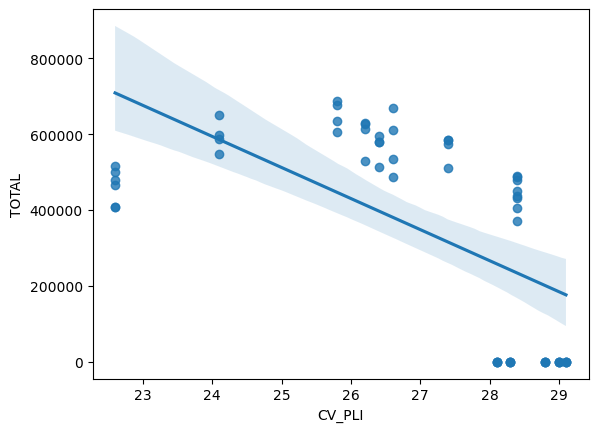

In [107]:
sns.regplot(x='CV_PLI',y='TOTAL', data=df)

<AxesSubplot:xlabel='TOTAL', ylabel='1month'>

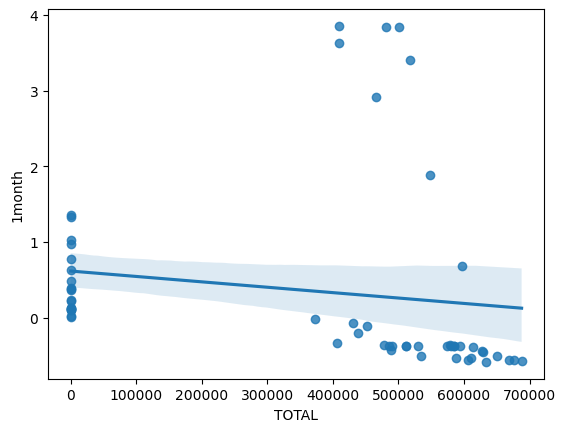

In [113]:
sns.regplot(x='TOTAL',y='1month', data=df)

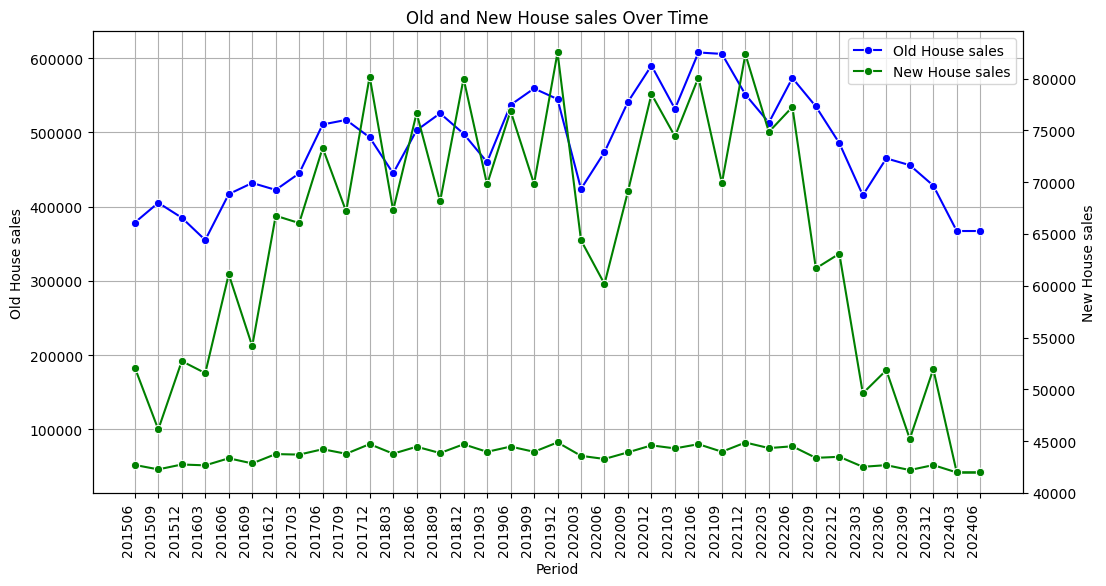

In [134]:

# Plotting
plt.figure(figsize=(12, 6))

# Plot 1: House sales over time
sns.lineplot(x='Formatted_Period', y='DW_EXST', data=df[df['Formatted_Period'] >= '201506'], marker='o', label='Old House sales', color='blue')

# Plot 2: HICP  over time (secondary y-axis)
sns.lineplot(x='Formatted_Period', y='DW_NEW', data=df[df['Formatted_Period'] >= '201506'], marker='o', label='New House sales', color='green')
plt.xticks(rotation=90, ha='right')
# Enhancing the plot
plt.title('Old and New House sales Over Time')
plt.xlabel('Period')
plt.ylabel('Old House sales')
plt.grid(True)

# Second y-axis
ax2 = plt.gca().twinx()
ax2.set_ylabel('New House sales')
sns.lineplot(x='Formatted_Period', y='DW_NEW', data= df[df['Formatted_Period'] >= '201506'], ax=ax2, marker='o', color='green')

plt.show()

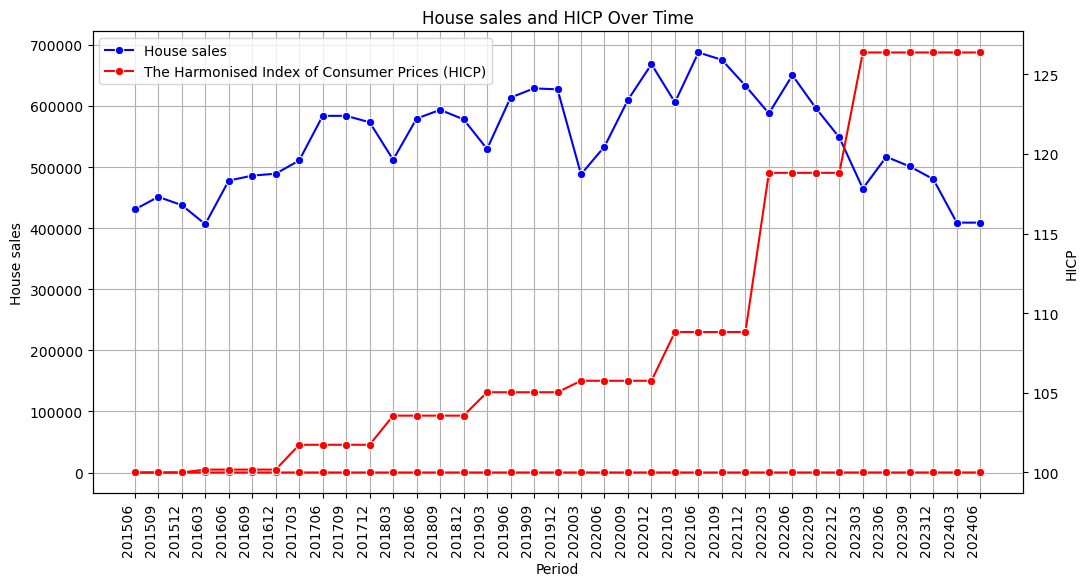

In [135]:

# Plotting
plt.figure(figsize=(12, 6))

# Plot 1: House sales over time
sns.lineplot(x='Formatted_Period', y='TOTAL', data=df[df['Formatted_Period'] >= '201506'], marker='o', label='House sales', color='blue')

# Plot 2: HICP  over time (secondary y-axis)
sns.lineplot(x='Formatted_Period', y='INX_A_AVG', data=df[df['Formatted_Period'] >= '201506'], marker='o', label='The Harmonised Index of Consumer Prices (HICP)', color='red')
plt.xticks(rotation=90, ha='right')
# Enhancing the plot
plt.title('House sales and HICP Over Time')
plt.xlabel('Period')
plt.ylabel('House sales')
plt.grid(True)

# Second y-axis
ax2 = plt.gca().twinx()
ax2.set_ylabel('HICP')
sns.lineplot(x='Formatted_Period', y='INX_A_AVG', data= df[df['Formatted_Period'] >= '201506'], ax=ax2, marker='o', color='red')

plt.show()

Let's do A/B testing
Nu
Parameter we are interested on: new and old houses sales
Null Hypothesis: new houses = old houses
Alternative Hypthosis: new houses <> old houses


In [138]:
import statsmodels.api as sm
 
sm.stats.ztest(df['DW_EXST'].dropna(), df['DW_NEW'].dropna())


(8.6287512347588, 6.202543025935738e-18)

The Statsmodels ztest function carries out the test and returns a test statistic (8.6287512347588) and p-value (6.202543025935738e-18). The p-value is quite small (<0.05), 
and therefore there is very strong evidence against the null hypothesis.
This means that sales between new and old houses are very different

In [142]:
 
sm.stats.ztest(df['DW_EXST_ind'].dropna(), df['DW_NEW_ind'].dropna())


(0.2178264853549004, 0.8275643076939203)

But if we look into index we see that we can't reject null null hypothesis